<a href="https://colab.research.google.com/github/br4bit/Neural-Network-Training/blob/master/Guide_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning (Apprendimento Rinforzato)

Il *Reinforcement Learning (RL)* è uno dei campi più eccitanti del Machine Learning oggi, e anche uno dei più vecchi, esiste dagli anni '50.

## Imparare ad ottimizzare i rewards.

Nel Reinforcement Learning, un software *agent* effettua delle *osservazioni* e intraprende delle *azioni* all'interno di un *ambiente (environment)*  e in cambio riceve dei *rewards*.

Il suo obiettivo è imparare ad agire in modo da massimizzare i suoi *rewards* a lungo termine. E' possibile pensare a *rewards* positivi come un piacere, e *rewards* negativi come un dolore/pena. In breve, l'agente agisce nell'ambiente e impara per tentativi ed errori a massimizzare il suo piacere e a minimizzare la sua pena.

Vediamo alcuni esempi di applicazione:

1 (a). L'agente può essere un programma che controlla il movimento di un robot. In questo caso, l'ambiente è il mondo reale, l'agente osserva l'ambiente attraverso un set di sensori, come camera e sensori touch, e agisce inviando segnali ai motori per attivarli. Può essere programmato per ricevere rewards positivi ogni volta che si avvicina alla destinazione, e reward negativi qualora perdesse tempo, andando nella direzione sbagliata o cade.

2 (b). L'agente può essere un programma che controlla Ms. Pac-Man. In questo caso, l'ambiente è la simulazione del gioco Atari. le azioni da intraprendere sono le 9 possibili posizioni del joystick (sopra,sotto,e così via), le osservazioni da cui osservare per intraprendere le azioni saranno gli screenshots, mentre i rewards i game point.

3 (c). L'agente può essere un semplice programma che gioca ad un gioco da tavolo come *Go*.

4 (d). Non necessariamente l'agente deve controllare dei movimenti virtuali o reali di un qualcosa. Ad esempio, può essere un semplice termostato, che riceve dei rewards ogni volta che è vicino alla suo obiettivo di temperatura e risparmia energia e rewards negativi ogni volta che una mano esterna gli modifichi la temperatura, in questo modo l'agente impara ad anticipare i bisogni umani.

5 (e). L'agente può osservare il prezzo di una merce in magazzino per decidere quando comprare e vendere ogni secondo. I rewards saranno ovviamente i guadagni e le perdite monetarie.

![alt text](https://i.gyazo.com/thumb/1000/8e9980121e73e72575469bc49abaff56-png.jpg)


Da notare che non sempre possono esserci rewards positivi; per sempio, l'agente può muoversi in un labirinto, ricevendo rewards negativi ad ogni istante di tempo, dove è meglio trovare un'uscita il più velocemente possibile. Ci sono un mucchio di task dove il RL è stato applicato come nel self-driving cars, per gli ads di una web page, o per controllare dove l'attenzione è focalizzata in un sistema di classificazione d'immagini.

## Policy Search (Determinazone delle azioni da intraprendere)

Il *Policy Search* può essere visto come una linea di condotta o un metodo per determinare le azioni che l'agente deve intraprendere. In breve, è un algoritmo usato dal software agent per determinare le sue azioni, è chiamato la sua *policy*. Per esempio, la policy potrebbe essere una rete neurale che riceve in input le osservazioni e da come output le azioni da compiere:

![alt text](https://i.gyazo.com/d2553cf9477314cc2d9db6282b49562c.png)


La policy può essere qualsiasi algoritmo a cui si possa pensare, e non deve essere nemmeno deterministico. Ad esempio, consideriamo un'aspirapolvere robotica, la cui ricompensa è la quantità di polvere che raccoglie in 30 minuti. La sua policy potrebbe essere quella di muoversi in avanti con una probabilità *p* ogni secondo, oppure ruotare in modo casuale a destra o a sinistra con una probabilità di *1-p*. L'angolo di rotazione sarà un angolo casuale compreso tra *-r e r*. Dal momento che questa policy introduce un pò di casualità è chiamata *stochastic policy*.
Il robot avrà una traiettoria errata, che garantisce che alla fine raggiungerà qualsiasi posto possa raggiungere e raccoglierà tutta la polvere. La domanda è: Quanta polvere riuscirà a raccogliere in 30 minuti?

Come si può addestrare questo robot? Ci sono solo due *policy parametri* che si possono modificare: la probabilità *p* e l'angolo *r*. Un possibile algoritmo di apprendimento potrebbe essere quello di provare molti valori diversi per questi parametri, e scegliere la combinazione che performa al meglio. Questo è un esempio di *policy search*, in questo caso utilizzando un approccio a forza bruta. Tuttavia quando lo *spazio di policy* è molto ampio, trovare un buon set di parametri in questo modo è come cercare un ago in un pagliaio.

Un'altra strada per esplorare lo *spazio di policy (policy space)*  è di usare un *genetic algorithms (algoritmi genetici)*. Per esempio, si potrebbe creare casualmente una prima generazione di 100 policies (criteri) e provarli, uccidere le 80 peggiori policies, e lasciare le restanti 20 come sopravvisuti che producono 4 figli ciascuno. Un figlio non è altro che una copia del suo genitore più una variazione casuale. Le policies sopravvisuti più la loro prole (figli) insieme costituiranno la seconda generazione. Il processo si itera attraverso tutte le generazioni in questo modo, finchè non si trova la policy perfetta.

![alt text](https://i.gyazo.com/ff957f4cf89c999079ebacbcb494c83c.png)


Un altro approccio può essere quello di una tecnica di ottimizzazione, che valuta i gradienti di ogni reward rispetto ai parametri della policy, quindi aggiustando questi parametri seguendo il gradiente verso i rewards più alti *gradient ascent*. Questo approccio è chiamato *policy gradients (PG)*.
Per esempio, torniamo indietro all'aspirapolvere, si potrebbe aumentare leggermente *p* e valutare se questo aumenta la quantità di polvere raccolta dal robot in 30 minuti; se lo fa, allora incrementa *p* un pò di più, o altrimenti riduci *p*. 

Prima di implementare l'algoritmo di PG usando TensorFlow, c'è bisogno di creare un ambiente per l'agente dove possa vivere. Introduciamo OpenAI gym.

## Introduzione OpenAI gym

Una delle sfide dell'apprendimento rinforzato è che per addestare un agente c'è bisogno di un ambiente di lavoro. Se si vuole programmare un agente che impara a giocare ad un gioco Atari, c'è bisogno di un simulatore di gioco Atari. Se si vuole programmare un robot che cammini, allora l'ambiente è il mondo reale dove si può addestrare direttamente il robot in quel ambiente, ma con delle limitazioni: se il robot cade da una scogliera, non basta solo "annullare" l'azione. Non è possibile accelerare il tempo; aggiungere più potenza computazionale non farà si che il robot si muova più velocemente. E in genere è molto costoso addestrare 1000 robot in parallelo.

In breve, l'addestramento nel mondo reale è lento e difficile, quindi c'è bisogno di un simulatore di ambienti, almeno per la prima fase dell'addestramento (bootstrap training).

*OpenAI gym* è un kit di strumenti che forniscono una varietà di simulatori di ambienti (Atari, tavola degli scacchi, mondo 2D, 3D, ecc), così si possono addestrare agenti, compararli tra di loro e implementare nuovi algoritmi di RL.

Installazione di *OpenAI gym*:

In [0]:
!pip3 install --upgrade gym

    100% |████████████████████████████████| 1.5MB 17.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/b9/fd/e1f54a4b99eca10de0d37cc7ecc2ac29a2e51b4eff7e1e5ca7
Successfully built gym
  Found existing installation: gym 0.10.11
    Uninstalling gym-0.10.11:
      Successfully uninstalled gym-0.10.11


Creazione del primo ambiente:

In google colab per utilizzare la funzione env.render() c'è bisogno di un piccolo passaggio:

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
from IPython.display import HTML

In [0]:
#eg screen resolution 1400x900

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


In [0]:

env = gym.make("CartPole-v0") #creazione ambiente

obs = env.reset() #osservazioni

obs

array([ 0.00309961, -0.04957267,  0.04632408,  0.02626396])

La funzione *make()* crea l'ambiente, in questo caso il carrello con asta. E' una simulazione 2D dove il carrello può accelerare nella direazione di destra e sinistra, per bilanciare l'asta posta al di sopra di esso:

![alt text](https://i.gyazo.com/0a9d7b15a9877b4ab5351ac643414084.png)

Dopo che l'ambiente è stato creato, bisogna inizializzarlo usando il metodo *reset()*. Il metodo ritorna la prima osservazione. Le osservazioni dipendono dal tipo di ambiente. Per il carrello con asta, ogni osservazione è un NumPy array di 1D, contenente 4 valori di tipo float: questi valori rappresentano, la posizione del carrello in orizzontale (0.0 = centro), la sua velocità, l'angolo dell'asta (0.0 = verticale) e la sua velocità angolare.

Chiediamo ora all'ambiente quali sono le possibili azioni con il metodo *action_space*:

In [0]:
env.action_space

Discrete(2)

*Discrete(2)* significa che le possibili azioni sono interi 0 e 1, che rappresentano l'accelerazione vero destra (1) e verso sinistra (0). Altri ambienti avranno più azioni o un altro tipo di azioni (nel continuo).
Dato che l'asta è inclinata verso destra, acceleriamo il carrello verso destra:

In [0]:
action = 1 #accelerazione verso destra

obs, reward, done, info = env.step(action)

print(obs,reward,done,info)

[ 0.00210815  0.1448554   0.04684936 -0.25145087] 1.0 False {}


Il metodo *step()* esegue l'azione sull'ambiente e ritorna 4 valori:

**obs** 

>Questa è la nuova osservazione. Il carrello ora si muove verso destra **(obs[1]>0)**. L'asta è inclinata verso sinistra **(obs[2]<0)**, e la sua velocità angolare è negativa **(obs[3]<0)**, sarà probabilmente inclinata verso sinista al prossimo step. 

**reward**

>In questo ambiente, si avrà sempre un reward di 1.0 ad ogni step, non importa cosa fai, l'obiettivo è quello di continuare a muovere il carrello il più a lungo possibile.

**done**

>Questo valore sarà *True* quando *episodio* è finito. Questo accadrà quando l'asta si inclinerà troppo. Dopodichè l'ambiente dovrà essere ripristinato prima di poterlo riutilizzare dinuovo.

**info**

>Questo dizionario può fornire ulteriori informazioni di debug in altri ambienti. Questi dati non dovrebbero essere usati per l'addestramento (usarli equivale a barare).


Proviamo a scrivere un pezzo di codice per una semplice policy che accelera il carrello verso destra quando l'asta è inclinata verso destra e accelera verso sinistra quando l'asta è inclinata a sinistra. Eseguiremo questa policy su 500 episodi per vedere i rewards medi che ottiene:





500 [52.0, 45.0, 54.0]


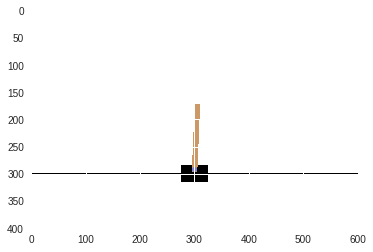

In [0]:
def azione_base(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(env.render(mode='rgb_array')) # Immagine ambiente

for episode in range(500):
  episode_rewards = 0 #Ad ogni inizio dell' episodio il reward è inizilizzato a 0
                      #questo perchè ad ogni uscita dal ciclo degli step, 
                      #l'asta si è inclinata troppo (done=true) o sono terminati gli step
  obs = env.reset()
  for step in range(1000): # Un massimo di 1000 step
    action = azione_base(obs)
    obs,reward,done,info = env.step(action)
    episode_rewards += reward #contatore dei rewards
    #Immagini del carrello con asta ad ogni step
      #img.set_data(env.render(mode='rgb_array')) # just update the data
      #display.display(plt.gcf())
      #display.clear_output(wait=True)

    if done:
      break
  totals.append(episode_rewards) #contiene il numero di rewards di ogni episode.
  
print(len(totals),totals[:3]) #numero di elementi e i primi 3 elementi della lista

Andiamo ora a vedere la media dei rewards positivi e altre informazioni:

In [0]:
import numpy as np

np.mean(totals), np.std(totals), np.min(totals), np.max(totals)


(42.006, 9.016981978467074, 24.0, 72.0)

Anche con 500 prove, questa policy non riesce a mantenere l'asta in verticale per più di 68 step consecutivi. Non molto bene. Dal render dell'ambiente è possibile vedere che il carro oscilla a destra e a sinistra finchè l'asta non si inclina del tutto.

Il codice sopra è una classica implementazione del ciclo "agente-ambiente".Ad ogni step, l'agente sceglie un *action*, e l'ambiente ritorna un *observation* e un *reward*:

![alt text](https://i.gyazo.com/390e7cd7e081ab42bab0650c1129069c.png)


Vediamo se una rete neurale può elaborare una policy migliore.

## Neural Network Policies

Creiamo una policy con rete neurale. Come la policy programmata sopra, anche questa rete neurale avrà come input un'osservazione e darà come output un' azione da eseguire. Più precisamente si stimerà la probabilità di ogni azione, e quindi selezioneremo un'azione in modo casuale in base alle probabilità stimate. Nell'ambiente del carrello con asta, ci sono solo due possibili azioni (destra o sinistra), c'è bisogno di un solo neurone di output. L'output sarà la probabilità *p* dell'azione 0 (sinistra), e la probabilità dell'azione 1 (destra) sarà *1-p*. Ad esempio, se l'output della rete sarà 0.7, allora si utilizzerà l'azione 0 con il 70% della probabilità, e l'azione 1 con il 30% di probabilità. 

![alt text](https://i.gyazo.com/2e55e2774da74940c4861290438e351b.png)

Perchè prendere delle azioni casuali basate sulla probabilità ? Non risulta più pratico prendere l'azione che ha ottenuto lo score più alto dall'output ? Beh no!!!
Questo approccio fa si che l'agente trovi il giusto bilanciamento tra l'esplorazione di nuove azioni e lo sfruttamento delle azioni che sono note per funzionare bene.

Ecco un'analogia per chiarire il concetto: Supponiamo di essere in un ristorante per la prima volta, tutti i piatti sembrano appetitosi, quindi ne scegliamo uno a caso. Se il piatto è buono, allora aumenta la probabilità di riordinarlo la prossima volta, ma non dovresti aumentare questa probabilità del 100% o meglio scegliere sempre lo stesso piatto o altrimenti si preclude la possibilità di provarne altri, alcuni dei quali potrebbero essere anche migliori di quello provato.

Da notare anche che questo tipo di ambiente le azioni passate e le osservazioni possono essere ignorate, poichè ogni azione contiene lo stato completo dell'ambiente. Se ci fosse qualche stato nascosto, allora potrebbe essere necessario considerare anche le azioni e le osservazioni pssate. Ad esempio, se l'ambiente rivela solamente la posizione del carrello ma non la sua velocità (tipico esempio di ambiente nel mondo reale), si dovrebbe considerare non solo l'osservazione corrente ma anche quella precedente in modo da stimare la sua velocità attuale.
Un altro esempio è quando le osservazioni sono rumorose; in tal caso, si utilizzano le ultime osservazioni per stimare lo stato corrente più probabile.

Il problema del carrello con asta è più semplice di come dovrebbe essere; le osservazioni sono senza rumore e contengono lo stato completo dell'ambiente.

Utilizziamo TensorFlow per costruire la nostra policy con una rete neurale:


In [0]:
import tensorflow as tf

# 1. Specifica dell'architettura della rete neurale

n_inputs = 4 # è la dimensione del vettore delle obs env.observation_space.shape[0]
n_hidden = 4 # è un task semplice non c'è bisogno di più neuroni
n_outputs = 1 # ci serve solo la probabilità che il carrello acceleri a sinistra
initializer = tf.contrib.layers.variance_scaling_initializer()

# 2. Costruzione della rete neurale

X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)

# 3. Selezione di un'azione casuale basata su quelle stimate (multinomial sampling)

prob_left_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(prob_left_right), num_samples=1)

init=tf.global_variables_initializer()

Analizziamo il codice:

1. Dopo import, definiamo l'architettura della nostra rete. Il numero di input è pari alla grandezza dello spazio delle osservazioni (4), utilizziamo 4 hidden neuroni e si ha solo 1 neurone di output che ci da la probabilità di andare a sinistra.

2. Costruzione della rete neurale. In questo esempio abbiamo una rete con un singolo output e un solo layer hidden. L'output layer usa la funzione di attivazione sigmoid in modo da dare come output una probabilità compresa tra 0.0 e 1.0. Se ci fossero state più di due azioni possibili nell'ambiente da parte dell'agente, allora ci sarebbe stato un neurone di output per ogni azione, e ovviamente sarebbe stato necessario l'uso della funzione softmax.

3. Infine, utilizziamo la funzione *multinomial()* per prelevare un'azione casuale. **Questa funzione campiona in modo del tutto indipendente uno o più numeri interi, data la probabilità di logaritmo di ogni intero**. Ad esempio, se chiamiamo la funzione su un array **[ np.log(0.5), np.log(0.2), np.log(0.3) ]** e **num_samples=5** , si hanno in output **5 interi**, ognuno dei quali avrà una probabilità del **50% di essere 0**, il **20% di essere 1** e il **30% di essere 2**. Nel nostro caso c'è bisogno di un solo intero che rappresenti l'azione da prendere* (c'è solo 1 intero che avrà una probabilità di (prob_left_right) di essere 0 (accelerazione sinistra))*.
Poichè il tensore *outputs* contiene solo la probabilità di andare a sinistra, dobbiamo prima concatenare *1-outputs* per avere un tensore che contiene le probabilità di entrambe le azioni, sinistra e destra. **Nota che se ci fossero più di due azioni possibili, la rete neurale avrebbe dovuto produrre una probabilità per(ogni) azione, quindi non avresti avuto bisogno della fase di concatenazione.**

Ora abbiamo la nostra policy con rete neurale (NN policy) che prenderà osservazioni e darà come output le azioni. Ma come l'addestriamo?

## Valutazione delle azioni: Il problema dell'assegnazione del reward (The Credit Assignment Problem)

 Se sapessimo quale fosse l'azione migliore in ogni fase (step), potremmo addestrare la rete neurale come al solito, minimizzando la cross entropy tra la probabilità stimata (y^) e la probabilità di destinazione (y). Come fosse un apprendimento supervisionato, dove si ha la probabilità target y e quella stimata y^ dalla rete neurale. Tuttavia nell'Apprendimento Rinforzato, l'unica guida che l'agente ha è quella attraverso i rewards e i rewards in genere sono scarsi e arrivano in ritardo. Ad esempio, se l'agente riesce a bilanciare l'asta per 100 step, come può sapere quale di queste 100 azioni è stata buona e quali di queste erano cattive? Tutto quello che sa è che l'asta è caduta dopo l'ultima azione, ma sicuramente quest'ultima azione non è interamente responsabile, ci sarà stato un insieme di azioni che ha eseguito che ha portato alla caduta dell'asta. Questo problema è chiamato *Credit assignment problem*: dove l'agente riceve dei rewards(o ricompensa), ma è difficile per lui determinare quali azioni dovrebbero essere accreditate (o incolpate) per essa (per il reward). In breve, l'agente ha bisogno di sapere quale sequenza di azioni ha portato il carrello a far mantenere l'asta in verticale e quali no, ha bisogno di sapere quali azioni devono essere accreditate per buone e quali no. Si pensi ad un cane che riceve la sua ricompensa dopo ore che si è comportato bene; come può capire per che cosa è stato ricompensato ?
Esempio pratico: finchè il carrello non cade esegui l'azione, sta ricevendo sempre rewards positivi, ma ad un tratto, l'asta cade, e  arriva il rewards negativo, come fa l'agente a sapere ora quale sequenza di azioni ha causato la caduta dell'asta? sa solo che nell'ultima azione ha ricevuto un rewards negativo, l'asta è caduta. Potrebbe pensare che tra le 100 azioni che ha eseguito solo l'ultima ha causato la caduta del carello, quindi conviene scartarla, ma anche in questo modo non funzionerebbe, le azioni che esegue sono solo quelle di accelerare verso destra o sinistra, non ha una visione generale sul numero di azioni che deve eseguire per mantenere l'asta in verticale e quindi accreditare queste azioni.

C'è bisogno di una strategia che valuti un'azione basandosi sulla somma di tutti i rewards che ne conseguono da essa, applicando un fattore di *discount  γ (gamma)* ad ogni step. Ad esempio (guardare la figura):

![alt text](https://i.gyazo.com/c0e247df550c2d9f5e4a4014448fb868.png)

Se l'agente decide di andare a destra 3 volte di seguito e riceve come ricompensa +10 dopo il primo step, 0 dopo il secondo e infine -50 dopo il terzo passo, quindi assumendo che si usa un fattore di sconto γ = 0.8, la prima azione avrà un puntaggio totale di 10 + γ x 0 + γ^2 x (-50) = -22. Se il fattore gamma è vicino 0, i rewards futuri non contano molto rispetto ai rewards immediati. Viceversa, se il fattore di sconto è vicino a 1, i rewards futuri (lontani) contano quasi quanto i rewards immediati. Tipicamente il fattore gamma è 0.95 o 0.99. Con gamma pari a 0.95, i rewards di 13 step nel futuro contano all'incirca come la metà dei rewards immediati (0.95^13 ≈ 0.5), mentre con un fattore di 0.99, i rewards di 69 step nel futuro contano come la metà dei rewards immediati.Nell'ambiente del carrrello con asta, le azioni hanno effetti a breve termine, quindi la scelta di un fattore gamma di 0.95 sembra ragionevole. Naturalmente, una buona azione può essere seguita da diverse azioni sbagliate che fanno cadere rapidamente l'asta, con il risultato che la buona azione ottiene un punteggio basso (come quando un buon attore recita in un film terribile).
Tuttavia, se effettuiamo abbastanza prove, in media le buone azioni otterranno un punteggio migliore di quelle cattive. Quindi, per ottenere punteggi di azioni affidabili, dobbiamo eseguire molti episodi e normalizzare tutti i punteggi delle azioni (sottraendo la media e dividendo per la deviazione standard, in modo da avere una distribuzione dei punteggi normale). Dopodichè, possiamo presumere che le azioni con punteggi negativi fossero negative, mentre le azioni con un punteggio buono erano buone.

Perfetto, ora abbiamo un modo per valutare ogni azione, il passo successivo consiste nel formare un'agente usando i gradienti del policy (*Policy Gradients*).

## Policy Gradients

Gli algoritmi PG ottimizzano i parametri di una policy seguendo i gradienti verso i rewards più alti. Una classe popolare di algoritmi PG, chiamati *REINFORCE algorithms* è stata introdotta nel 1992 da Ronald Williams. Ecco una variante di questi algoritmi: